In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# 시계열 데이터 생성
np.random.seed(0)
n = 100  # 데이터 포인트 수
ar_params = [0.7]  # 자기회귀 계수
ma_params = [0.4, -0.2]  # 이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

In [3]:
# ARMA(1, 2) 모델 생성
data = [0, 0]  # 초기값 설정
for i in range(2, n):
    ar_term = ar_params[0] * data[i-1]
    ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
    data.append(ar_term + ma_term + residuals[i])

In [4]:
# 데이터프레임 생성
df = pd.DataFrame({'Value': data})
print(df)

       Value
0   0.000000
1   0.000000
2   0.785990
3   3.102550
4   4.739953
..       ...
95  2.160229
96  1.734016
97  2.862567
98  2.842957
99  2.085650

[100 rows x 1 columns]


In [5]:
# ARIMA 모델 적합
model = ARIMA(df['Value'], order=(1, 0, 2))
results = model.fit()

In [6]:
# ARIMA 모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.937
Date:                Tue, 13 Jun 2023   AIC                            291.874
Time:                        16:28:07   BIC                            304.900
Sample:                             0   HQIC                           297.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1564      0.510      0.307      0.759      -0.842       1.155
ar.L1          0.7647      0.129      5.934      0.000       0.512       1.017
ma.L1          0.3757      0.158      2.382      0.0

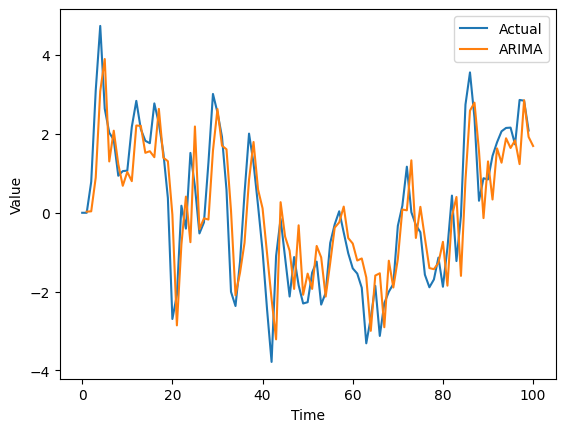

In [7]:
# 예측 결과 그래프 출력
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()